## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Samdure\Downloads\TaxiFare.csv')

In [3]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
df.drop('unique_id',axis=1,inplace=True)

In [5]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [6]:
df.value_counts('amount')

amount
6.50      2468
4.50      2104
8.50      1929
6.10      1441
5.30      1440
          ... 
34.54        1
34.45        1
34.44        1
34.19        1
200.00       1
Name: count, Length: 703, dtype: int64

In [7]:
 df.no_of_passenger.value_counts()

no_of_passenger
1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: count, dtype: int64

In [8]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [12]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2


In [13]:
df.corr()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.125725,0.005944,-0.007338,0.004286,-0.005442,0.016583
date_time_of_pickup,0.125725,1.000000,-0.001157,-0.001309,0.000025,-0.002057,0.007901
longitude_of_pickup,0.005944,-0.001157,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.001309,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.000025,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.002057,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,0.007901,-0.005604,0.003237,-0.004936,0.002958,1.000000


In [14]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

## Data Visualization

<Axes: >

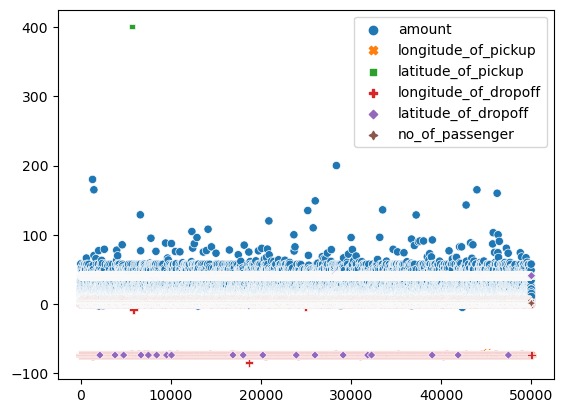

In [15]:
sb.scatterplot(df)

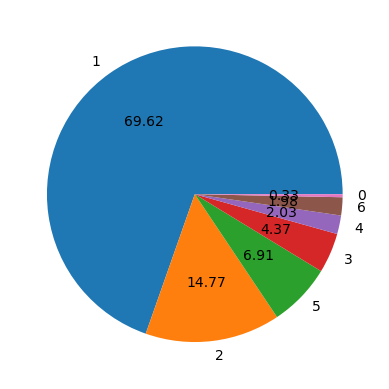

In [16]:
plt.pie(df['no_of_passenger'].value_counts().values,labels=df['no_of_passenger'].value_counts().index,autopct='%.2f')
plt.show()

<Axes: xlabel='no_of_passenger', ylabel='count'>

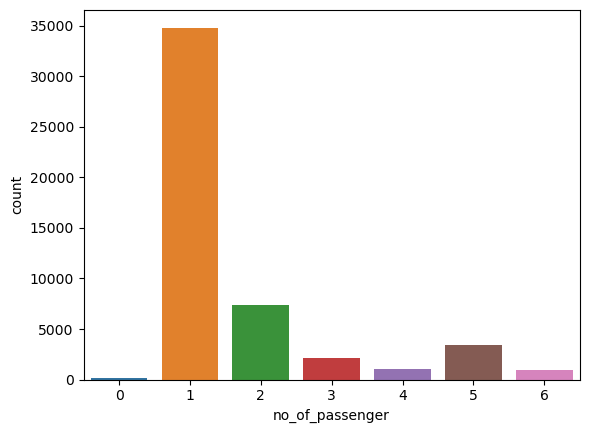

In [17]:
sb.countplot(x='no_of_passenger', data=df)

<Axes: >

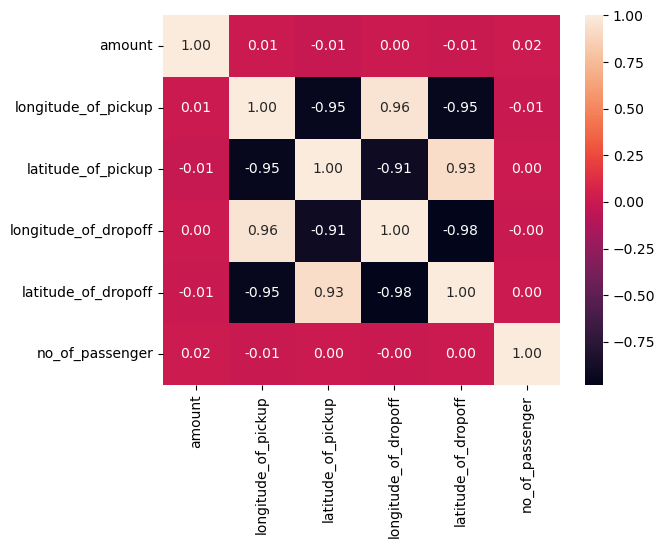

In [18]:
corr = df.drop('date_time_of_pickup',axis=1).corr()
sb.heatmap(corr,annot=True,fmt='0.2f')

<Axes: xlabel='amount', ylabel='Density'>

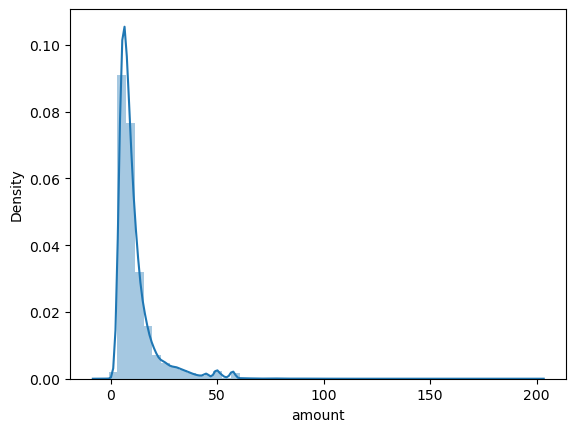

In [19]:
sb.distplot(df['amount'])

In [20]:

df.shape

(50000, 7)

In [21]:
df.describe()


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [22]:
df.drop('date_time_of_pickup',axis=1,inplace=True)

In [23]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

## Train test split

In [24]:
x=df.drop('amount',axis=1)
y=df['amount']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

##  Random Forest 

In [26]:
rf = RandomForestRegressor(random_state=32)

In [27]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=32)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


In [29]:
y_pred = rf.predict(x_test)

In [30]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Meab Absolute Error:',mae)
print('Meab Squared Error:',mse)
print('Root Mean Squared Error:',rmse)

Meab Absolute Error: 2.3128104244997725
Meab Squared Error: 22.402912313737886
Root Mean Squared Error: 4.733171485773348


In [31]:
r2 = r2_score(y_test,y_pred)
print('R2 Score:',r2)

R2 Score: 0.7590393398265386


## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [34]:
x1 = df.drop(['amount'],axis=1)
y1 = df.amount

In [35]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)
y_pred

array([11.84000142, 11.25217106, 11.62915542, ..., 11.25094501,
       11.39585001, 11.25031238])

In [37]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [38]:
print('Meab Absolute Error:',mae)
print('Meab Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R2 Score:',r2)

Meab Absolute Error: 6.018152105898266
Meab Squared Error: 92.97982871323858
Root Mean Squared Error: 9.642604871778092
R2 Score: -7.001749582702388e-05


## Grid SearchCV

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [40]:
param_grid ={
    'n_estimators':[10.50,100,150],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,8,10]
}

In [41]:
rf1=RandomForestRegressor(random_state=42)

In [42]:
# parallel working,distributed working,
# n_jobs= paralleling working
# verbose
grid_search=GridSearchCV(estimator=rf1,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [43]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [10.5, 100, 150]},
             verbose=2)

In [44]:
print('Best parameters:',grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}


In [45]:
best_model=grid_search.best_estimator_
pred = best_model.predict(x_test)

In [46]:
mae_grid=mean_absolute_error(y_test,pred)
mse_grid=mean_squared_error(y_test,pred)
rmse_grid=np.sqrt(mse)
r2_grid = r2_score(y_test,pred)

In [47]:
print('Meab Absolute Error:',mae_grid)
print('Meab Squared Error:',mse_grid)
print('Root Mean Squared Error:',rmse_grid)
print('R2 Score:',r2_grid)

Meab Absolute Error: 2.28194773027919
Meab Squared Error: 22.05978905890401
Root Mean Squared Error: 9.642604871778092
R2 Score: 0.7627298959849421


In [48]:
!pip install folium

In [49]:
# folium use for map purpose
import folium

In [50]:
map_center = [40.712278, -73.84161]
zoom_level = 10

map_object = folium.Map(location=map_center,zoom_start=zoom_level)

In [51]:
latitude_list=[40.712278,40.782004,40.750562,40.758092]
longitude_list=[-73.84161,-73.979268,-73.991242,-73.991567]

In [52]:
#f format string
for lat,lon in zip(latitude_list,longitude_list):
    folium.Marker([lat,lon],popup=f'lat: {lat},Lon:{lon}').add_to(map_object)

In [53]:
#map_object

In [54]:
map_center = [40.712278, -73.84161]
zoom_level = 10

map_object = folium.Map(location=map_center,zoom_start=zoom_level)

In [55]:
latitude_list=[19.218330]
longitude_list=[72.978088]

In [56]:
for lat,lon in zip(latitude_list,longitude_list):
    folium.Marker([lat,lon],popup=f'lat: {lat},Lon:{lon}').add_to(map_object)
map_object